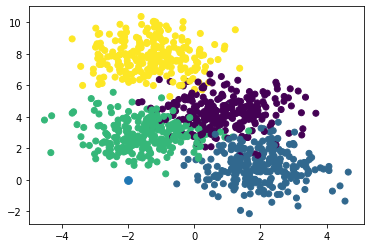

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
    #making data set for knn 
X, y = make_blobs(n_samples=1000, centers=4, random_state=0)

point = np.array([-2, 0])

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(point[0], point[1], s=60)

#impleenting custom knn

In [22]:
class CustomKnn:
    def __init__(self,n_neighbours=5):
        self.n_neighbours=n_neighbours
        
    def fit(self,X,y):
        self.__X=X
        self.__y=y
        
    def dist(self,point):
        
        distance=np.sqrt(((self.__X-point)**2).sum(axis=1))
        
        index=distance.argsort() #returns index in a sorted way on basis of original values
        
        k_points=index[:self.n_neighbours]
        
        votes=self.__y[k_points]
        
        votes,count=np.unique(votes,return_counts=True)
        
        return votes[count.argmax()] #return the value with highest freq
    
    def predict(self,test_point):
        result=[]
        
        for point in test_point:
            result.append(self.dist(point))
        return np.array(result)
    
    def score(self,X,y):
        yp=self.predict(X)
        return np.mean(yp==y) 

In [23]:
model=CustomKnn(n_neighbours=5)

In [24]:
model.fit(X,y)

In [27]:
model.dist(point)

2

In [28]:
model.score(X, y)

0.943

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42) #because our training and testing were same before

In [31]:
model.predict(X_test)

array([0, 0, 0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 0, 1, 2, 0, 1, 3, 1, 3, 2, 2,
       1, 1, 0, 1, 2, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 2, 3, 3, 2, 3, 2,
       3, 3, 0, 3, 3, 2, 2, 0, 3, 1, 1, 1, 1, 3, 0, 3, 3, 3, 1, 0, 1, 2,
       3, 2, 3, 1, 3, 2, 1, 0, 0, 3, 2, 2, 0, 0, 3, 0, 3, 2, 0, 2, 3, 0,
       1, 1, 2, 3, 0, 1, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 0, 0, 0,
       0, 2, 3, 0, 2, 2, 0, 1, 2, 3, 0, 1, 3, 1, 1, 2, 0, 0, 0, 3, 2, 2,
       2, 3, 1, 1, 1, 0, 2, 3, 3, 3, 1, 3, 3, 1, 2, 3, 2, 3, 2, 1, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 2, 0, 3, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 3, 3, 0, 2, 2, 0, 2, 1, 0, 3, 2, 0, 2, 2, 2, 3, 2, 3, 0, 3, 3,
       0, 2, 2, 2, 2, 1, 1, 3, 0, 0, 1, 1, 3, 3, 1, 3, 1, 1, 2, 3, 0, 3,
       3, 1, 1, 0, 3, 3, 0, 2, 0, 3, 1, 2, 0, 2, 2, 0, 0, 3, 1, 2, 2, 1,
       1, 0, 2, 1, 2, 3, 1, 2, 0, 1, 0, 1, 1, 2, 3, 1, 2, 0, 0, 1, 2, 0,
       3, 2, 2, 3, 0, 0, 3, 1, 0, 0, 3, 0, 2, 3, 0, 3, 2, 3, 2, 1, 2, 2,
       0, 0, 0, 1, 3, 1, 2, 3, 0, 3, 0, 0, 1, 1, 1,

In [33]:
#inbuilt knn

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
model.predict?

Signature: model.predict(X)
Docstring:
Predict the class labels for the provided data.

Parameters
----------
X : array-like, shape (n_queries, n_features),                 or (n_queries, n_indexed) if metric == 'precomputed'
    Test samples.

Returns
-------
y : array of shape [n_queries] or [n_queries, n_outputs]
    Class labels for each data sample.
File:      c:\users\verma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py
Type:      method
